In [3]:
import pandas as pd
import numpy as np

In [4]:
data = {
    "temp" : [50,50,50,70,70,70,80,80,80,90,90,90,100,100,100],
    "Yield" : [3.3,2.8,2.9,2.3,2.6,2.1,2.5,2.9,2.4,3.0,3.1,2.8,3.3,3.5,3.0]
}

# print(dat)

df = pd.DataFrame(data)
df.head




<bound method NDFrame.head of     temp  Yield
0     50    3.3
1     50    2.8
2     50    2.9
3     70    2.3
4     70    2.6
5     70    2.1
6     80    2.5
7     80    2.9
8     80    2.4
9     90    3.0
10    90    3.1
11    90    2.8
12   100    3.3
13   100    3.5
14   100    3.0>

In [5]:
df.to_csv('data.csv')

In [6]:
df.shape[0]

15

In [7]:
x11 = df.shape[0] #n
x12 = df["temp"].sum() #sum(x)
x13 = (df["temp"] ** 2).sum() #sum(x^2)

x21 = x12 #sum(x)
x22 = x13 #sum(x^2)
x23 = (df["temp"] ** 3).sum() #sum(x^3)

x31 = x22 #sum(x^2)
x32 = x23 #sum(x^3)
x33 = (df["temp"] ** 4).sum() #sum(x^4)


In [8]:
A = np.array([
    [x11, x12, x13],
    [x21, x22, x23],
    [x31, x32, x33]
])


In [9]:
A


array([[       15,      1170,     95700],
       [     1170,     95700,   8127000],
       [    95700,   8127000, 710490000]], dtype=int64)

In [10]:
# X = np.array([1,1,1])
# X

In [11]:
y1 = df["Yield"].sum()
y2 = (df["temp"] * df["Yield"]).sum()
y3 = ((df["temp"] ** 2) * df["Yield"]).sum()


In [12]:
B = np.array([y1,y2,y3])
B

array([4.2500e+01, 3.3450e+03, 2.7681e+05])

##### using Ax = B
##### => x = A^-1 * B

In [13]:
X = np.linalg.inv(A).dot(B)

In [14]:
c,b,a = X #c,b,a = a0,a1,a2 where y = a0 + a1x + a2x^2
X # polynomial regression output



array([ 7.96048110e+00, -1.53711340e-01,  1.07560137e-03])

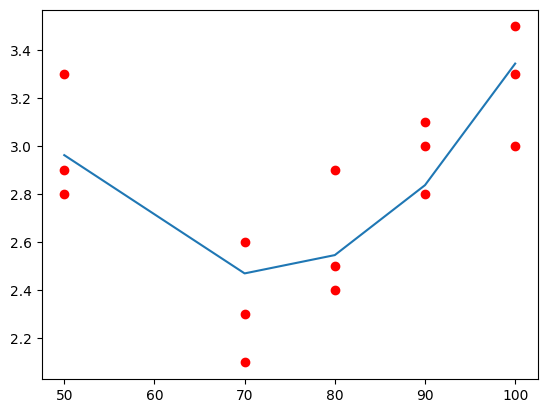

In [15]:
import matplotlib.pyplot as plt

actual = df["Yield"]
plt.plot(df["temp"],actual, 'ro')
#plot a line with equation y = c + bx + ax^2
y = c + b*df["temp"] + a*(df["temp"] ** 2)
plt.plot(df["temp"],y)
quad_ans = []
for x in df["temp"]:
    y = c*x + b*x + a*x
    quad_ans.append(y)
# plt.plot(quad_ans)
# plt.legend()
plt.show()


In [16]:
#getting predicted values in a list

quad_ans = []
for x in df["temp"]:
    op = c + b*x + a*x**2
    quad_ans.append(op)

quad_ans  = pd.Series(quad_ans)



In [17]:
#calculating error
error = df["Yield"] - quad_ans
error

0     0.336082
1    -0.163918
2    -0.063918
3    -0.171134
4     0.128866
5    -0.371134
6    -0.047423
7     0.352577
8    -0.147423
9     0.161168
10    0.261168
11   -0.038832
12   -0.045361
13    0.154639
14   -0.345361
dtype: float64

In [18]:
#calculating mean squared error
sum_square_error =0
for i in range(len(error)):
    sum_square_error += error[i] ** 2
mean_square_error = sum_square_error / len(error)
mean_square_error

0.0477846506300115

In [19]:
#calculating rmse
rmse = np.sqrt(mean_square_error)
rmse

0.21859700508015087

#### Question 2

In [23]:
import pandas as pd

# Data
data = {
    "Infarc": [0.119, 0.19, 0.395, 0.469, 0.13, 0.311, 0.418, 0.48, 0.687, 0.847,
               0.062, 0.122, 0.033, 0.102, 0.206, 0.249, 0.22, 0.299, 0.35, 0.35, 
               0.588, 0.379, 0.149, 0.316, 0.39, 0.429, 0.477, 0.439, 0.446, 0.538, 
               0.625, 0.974],
    "Area": [0.34, 0.64, 0.76, 0.83, 0.73, 0.82, 0.95, 1.06, 1.2, 1.47, 
             0.44, 0.77, 0.9, 1.07, 1.01, 1.03, 1.16, 1.21, 1.2, 1.22, 
             0.99, 0.77, 1.05, 1.06, 1.02, 0.99, 0.97, 1.12, 1.23, 1.19, 
             1.22, 1.4],
    "Group": [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 
              1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 
              2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 
              2,2],
    "X2": [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
           1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 
           0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
           0, 0],
    "X3": [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
           0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
           1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 
           1, 1]
}

# print(len(data["Infarc"]))
# print(len(data["Area"]))
# print(len(data["Group"]))
# print(len(data["X2"]))
# print(len(data["X3"]))


# Convert to DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
print(df)


    Infarc  Area  Group  X2  X3
0    0.119  0.34      3   0   0
1    0.190  0.64      3   0   0
2    0.395  0.76      3   0   0
3    0.469  0.83      3   0   0
4    0.130  0.73      3   0   0
5    0.311  0.82      3   0   0
6    0.418  0.95      3   0   0
7    0.480  1.06      3   0   0
8    0.687  1.20      3   0   0
9    0.847  1.47      3   0   0
10   0.062  0.44      1   1   0
11   0.122  0.77      1   1   0
12   0.033  0.90      1   1   0
13   0.102  1.07      1   1   0
14   0.206  1.01      1   1   0
15   0.249  1.03      1   1   0
16   0.220  1.16      1   1   0
17   0.299  1.21      1   1   0
18   0.350  1.20      1   1   0
19   0.350  1.22      1   1   0
20   0.588  0.99      2   0   1
21   0.379  0.77      2   0   1
22   0.149  1.05      2   0   1
23   0.316  1.06      2   0   1
24   0.390  1.02      2   0   1
25   0.429  0.99      2   0   1
26   0.477  0.97      2   0   1
27   0.439  1.12      2   0   1
28   0.446  1.23      2   0   1
29   0.538  1.19      2   0   1
30   0.6

#### Intuitive Method

yi is the size of the infarcted area (in grams) of rabbit i

xi1 is the size of the region at risk (in grams) of rabbit i

xi2 = 1 if early cooling of rabbit i, 0 if not

xi3 = 1 if late cooling of rabbit i, 0 if not and the independent error terms εi follow a

In [24]:
y = df["Infarc"]
x1 = df["Area"]
x2 = df["X2"]
x3 = df["X3"]


Coefficients (Intercept, Area, X2, X3): [-0.12775917  0.6049536  -0.27849939 -0.04894469]
Mean Squared Error: 0.013528226902025802

Actual vs Predicted Values:
Actual | Predicted
0.119  |  0.078
0.190  |  0.259
0.395  |  0.332
0.469  |  0.374
0.130  |  0.314
0.311  |  0.368
0.418  |  0.447
0.480  |  0.513
0.687  |  0.598
0.847  |  0.762
0.062  |  -0.140
0.122  |  0.060
0.033  |  0.138
0.102  |  0.241
0.206  |  0.205
0.249  |  0.217
0.220  |  0.295
0.299  |  0.326
0.350  |  0.320
0.350  |  0.332
0.588  |  0.422
0.379  |  0.289
0.149  |  0.458
0.316  |  0.465
0.390  |  0.440
0.429  |  0.422
0.477  |  0.410
0.439  |  0.501
0.446  |  0.567
0.538  |  0.543
0.625  |  0.561
0.974  |  0.670


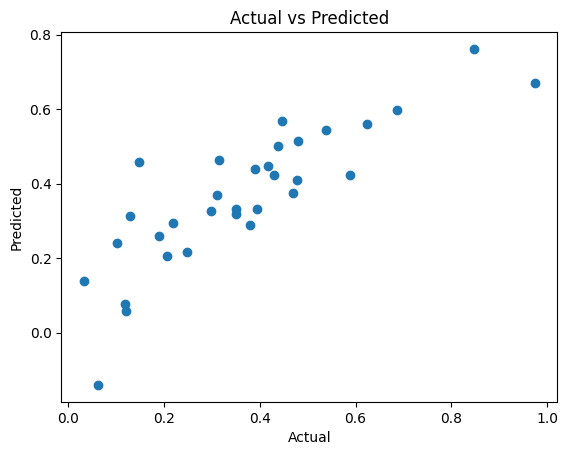

In [25]:
import numpy as np

# Extract the necessary data
y = df["Infarc"].values
X = df[["Area", "X2", "X3"]].values

# Add a column of ones to X for the intercept term
X = np.column_stack((np.ones(X.shape[0]), X))

# Calculate the coefficients using the normal equation
beta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

# Display the coefficients
print("Coefficients (Intercept, Area, X2, X3):", beta)

# Predict the values
predictions = X.dot(beta)

# Calculate the Mean Squared Error (MSE)
mse = np.mean((y - predictions) ** 2)
print("Mean Squared Error:", mse)

# Plotting the results
print("\nActual vs Predicted Values:")
print("Actual | Predicted")
for actual, predicted in zip(y, predictions):
    print(f"{actual:.3f}  |  {predicted:.3f}")


import matplotlib.pyplot as plt
plt.scatter(y, predictions)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.show()